In [1]:
import sys
sys.path.insert(0, '../../')

import bz2
import pickle
import numpy as np
import VAMPIRES_data
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [22]:
VAMP_path = "../../"
VAMP_data = "diffdata_RLeo_03_20170313_750-50_18holeNudged_0_0.idlvar"
VAMP_data_info = "cubeinfoMar2017.idlvar"

# load in external data
VAMP_data = VAMPIRES_data.VAMPIRES_data(VAMP_path + VAMP_data, VAMP_path + VAMP_data_info)

VAMP_data.vhvv -= np.mean(VAMP_data.vhvv) - 1
VAMP_data.vhvvu -= np.mean(VAMP_data.vhvvu) - 1

print(VAMP_data.vhvv)

[0.99197895 0.99670309 0.99984124 1.00120767 0.99944037 1.00811959
 1.00136523 0.99976181 1.01167629 0.99269154 1.02271184 1.00847441
 0.99423707 1.00846228 1.00019283 0.99276017 1.0062428  0.97725532
 1.00470626 0.99745861 1.00998978 0.98986243 0.98606028 0.99188705
 1.01162537 1.00850135 0.99293034 1.00511926 0.95688451 1.0115493
 0.98368575 1.00012079 1.00275898 1.01668667 0.99386589 1.00496389
 0.99345965 1.01442571 0.97025447 1.00585009 1.00436527 1.01939603
 1.01220662 0.9691553  1.01873821 0.99814715 1.01113327 1.00605218
 1.00350918 1.0149631  1.00008157 0.97854555 1.00149515 0.99639212
 1.03631841 1.04710175 1.01330497 1.00091657 1.01362242 0.99894529
 0.98832117 1.00246227 0.99512479 0.99942283 0.97489307 1.01826744
 0.96378389 1.00856087 1.00589761 1.00429888 0.99601119 0.97515504
 1.01515626 0.98179081 1.01833858 0.99917396 0.98553899 0.99762847
 0.99175556 1.01043809 1.00232947 1.00626629 1.00671143 1.00407528
 0.99169309 0.96397268 1.00378137 1.01234055 0.97537027 1.00155

In [3]:
with bz2.open("./results_obj", "rb") as f:
    results = pickle.load(f)

results.results_folder = "./"

In [4]:
def index_mins(self):
    return np.argmin(self.data['fitness'], axis = 1)

In [55]:
def draw_correlate(i, ax, VAMP_data, Stokes, baseline_colours, bar_colour, self):

    plt.cla()
    ind = index_mins(self)
    ax.set_xlim([0.97, 1.04])
    ax.set_ylim([0.97, 1.04])
    plt.plot([0.97, 1.04], [0.97, 1.04])

    if 'Q' in Stokes:
        obs_data = VAMP_data.vhvv
        sim_data = self.data["data_Q"][i][ind[i]]
        errors = VAMP_data.vhvverr
        title = "Correlation (Stokes Q)"
        scatter_plot = ax.scatter(sim_data, obs_data, c=baseline_colours)
        ax.errorbar(sim_data, obs_data, yerr=errors, marker='', linestyle='', alpha=0.8, capsize=0, zorder=0, ecolor=bar_colour)
    if 'U' in Stokes:
        obs_data = VAMP_data.vhvvu
        sim_data = self.data["data_U"][i][ind[i]]
        errors = VAMP_data.vhvvuerr
        title = "Correlation (Stokes U)"
        scatter_plot = ax.scatter(sim_data, obs_data, c=baseline_colours)
        ax.errorbar(sim_data, obs_data, yerr=errors, marker='', linestyle='', alpha=0.8, capsize=0, zorder=0, ecolor=bar_colour)

    if 'Q' in Stokes and 'U' in Stokes:
        title = 'Correlation'
        
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, '$\chi^2$ Error:', transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_title(title)
    ax.set_xlabel("Model Visibility Ratio")
    ax.set_ylabel("Observed Visibility Ratio")



In [56]:
def correlate(self, VAMP_data, filename = None, Stokes = "QU", fps = 30):

    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    baselines = VAMP_data.blengths
    # only select the baselines that are smaller than the maximum baseline
    baseline_colours = baselines[baselines <= 8]
    
    scatter_plot = ax.scatter(VAMP_data.vhvv, VAMP_data.vhvv, alpha = 0, c=baseline_colours)
    clb = plt.colorbar(scatter_plot, label="Baseline length (m)")
    bar_colour = clb.to_rgba(baseline_colours)

    ani = animation.FuncAnimation(fig, draw_correlate, fargs=(ax, VAMP_data, Stokes, baseline_colours, bar_colour, self), frames=self.epochs, interval=5, repeat=True)
    if filename is not None:
        ani.save("{}/{}.gif".format(self.results_folder, filename), writer='imagemagick', fps=fps)
    else:
        ani.save("{}/Correlation_{}.gif".format(self.results_folder, Stokes),
             writer='imagemagick', fps=fps)

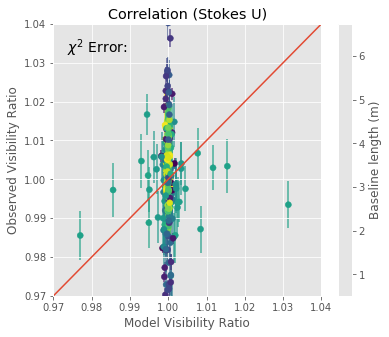

In [57]:
correlate(results, VAMP_data)

In [61]:
def draw_vis(i, ax, VAMP_data, Stokes, baseline_colours, bar_colour, ylim, self):

    plt.cla()
    ind = index_mins(self)
    ax.set_ylim(ylim)

    if 'Q' in Stokes:
        obs_data = VAMP_data.vhvv
        sim_data = self.data["data_Q"][i][ind[i]]
        errors = VAMP_data.vhvverr
        title = "Correlation (Stokes Q)"
        
    if 'U' in Stokes:
        obs_data = VAMP_data.vhvvu
        sim_data = self.data["data_U"][i][ind[i]]
        errors = VAMP_data.vhvvuerr
        title = "Correlation (Stokes U)"

    scatter_plot = ax.scatter(VAMP_data.bazims, obs_data, marker = 'x', c=baseline_colours, label = 'observed')
    scatter_plot = ax.scatter(VAMP_data.bazims, sim_data, marker = 'o', c=baseline_colours, label = 'model')
    ax.errorbar(VAMP_data.bazims, obs_data, yerr=errors, marker='', linestyle='', alpha=0.8, capsize=0, zorder=0, ecolor=bar_colour)
        
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, '$\chi^2$ Error:', transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_title(title)
    ax.set_xlabel("Polarised Visibility Ratio")
    ax.set_ylabel("Baseline Azimuth Angle (radians)")

In [65]:
def vis(self, VAMP_data, filename = None, Stokes = "Q", fps = 30, ylim = [0.96, 1.04]):

    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    baselines = VAMP_data.blengths
    # only select the baselines that are smaller than the maximum baseline
    baseline_colours = baselines[baselines <= 8]
    
    scatter_plot = ax.scatter(VAMP_data.vhvv, VAMP_data.vhvv, alpha = 0, c=baseline_colours)
    clb = plt.colorbar(scatter_plot, label="Baseline length (m)")
    bar_colour = clb.to_rgba(baseline_colours)

    ani = animation.FuncAnimation(fig, draw_vis, fargs=(ax, VAMP_data, Stokes, baseline_colours, bar_colour, ylim, self), frames=self.epochs, interval=5, repeat=True)
    if filename is not None:
        ani.save("{}/{}.gif".format(self.results_folder, filename), writer='imagemagick', fps=fps)
    else:
        ani.save("{}/visibilities_{}.gif".format(self.results_folder, Stokes),
             writer='imagemagick', fps=fps)

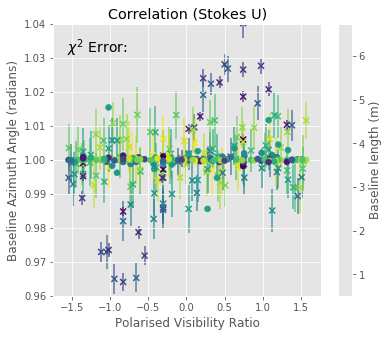

In [67]:
vis(results, VAMP_data, Stokes = 'U')